# MTA Exploratory Data Analysis

# Introduction
Have you ever been stuck on a subway ride or late for a meetup due to the traffic you encounter at the stop? 90% of people have faced this problem before so it is struggling in our lifestyle and we have to find a solution to this problem to make our life easier.
#Everyone is obliged to use the metro because of the high prices of petrol and cars, so it is very important to have an effective solution to this problem.


In [186]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

### READ THE DATA FOR 3 MONTHS

In [187]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210206,210213, 210220,210227,210306,210313,210320,210327] 
df = get_data_parse_dt(week_nums)

In [188]:
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-01-30 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693
1,2021-01-30 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703
2,2021-01-30 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755
3,2021-01-30 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793
4,2021-01-30 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811


In [189]:
copy_df = df.copy() 

### If there is spaces in columns names we remove it 

In [190]:
copy_df.columns = [column.strip() for column in copy_df.columns]
copy_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

### Show the duplicated rows

In [191]:
(copy_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1150028,R160A,R164,00-06-00,66 ST-LINCOLN,2021-02-08 12:00:00,2
1124363,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-01 03:00:00,2
1124373,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-02 15:00:00,2
1124372,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-02 11:00:00,2
1124371,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-02 07:00:00,2


### select REGULAR rows

In [192]:
mask = df["DESC"] == "REGULAR"
copy_df = copy_df[mask]

copy_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-01-30 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693
1,2021-01-30 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703
2,2021-01-30 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755
4,2021-01-30 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811
5,2021-01-30 23:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,23:00:00,REGULAR,7524821,2564823


### Drop columns

In [193]:
df_station = copy_df.drop(["DESC","C/A","UNIT", "SCP", "LINENAME", "DIVISION"], axis=1, errors="ignore")

In [194]:
df_station.head(5)

,DATE_TIME,STATION,DATE,TIME,ENTRIES,EXITS
0,2021-01-30 03:00:00,59 ST,01/30/2021,03:00:00,7524539,2564693
1,2021-01-30 07:00:00,59 ST,01/30/2021,07:00:00,7524543,2564703
2,2021-01-30 11:00:00,59 ST,01/30/2021,11:00:00,7524566,2564755
4,2021-01-30 19:00:00,59 ST,01/30/2021,19:00:00,7524739,2564811
5,2021-01-30 23:00:00,59 ST,01/30/2021,23:00:00,7524821,2564823


### Find the max daily ENTRIES & EXITS for each station 

In [195]:
df_station_daily = (df_station.groupby(["STATION", "DATE_TIME"],as_index=False).ENTRIES.sum())
df_station_daily["EXITS"] = df_station.groupby(["STATION", "DATE_TIME"],as_index=False).EXITS.sum()["EXITS"]
df_station_daily.head(10)

,STATION,DATE_TIME,ENTRIES,EXITS
0,1 AV,2021-01-30 03:00:00,463063395,466412394
1,1 AV,2021-01-30 07:00:00,463063440,466412629
2,1 AV,2021-01-30 11:00:00,463063999,466413822
3,1 AV,2021-01-30 15:00:00,463065246,466415850
4,1 AV,2021-01-30 19:00:00,463066639,466418145
5,1 AV,2021-01-30 23:00:00,463067495,466419217
6,1 AV,2021-01-31 03:00:00,463067651,466419451
7,1 AV,2021-01-31 07:00:00,463067676,466419672
8,1 AV,2021-01-31 11:00:00,463068128,466420499
9,1 AV,2021-01-31 15:00:00,463069055,466422138


### Find the DAILY_ENTRIES & DAILY_EXITS for each station

In [196]:
df_station_daily["DAILY_ENTRIES"] = (df_station_daily["ENTRIES"]).diff()
df_station_daily["DAILY_EXITS"] = (df_station_daily["EXITS"]).diff()
df_station_daily.dropna(subset=["DAILY_ENTRIES", "DAILY_EXITS"], axis=0, inplace = True)

In [197]:
df_station_daily.head()

,STATION,DATE_TIME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS
1,1 AV,2021-01-30 07:00:00,463063440,466412629,45.0,235.0
2,1 AV,2021-01-30 11:00:00,463063999,466413822,559.0,1193.0
3,1 AV,2021-01-30 15:00:00,463065246,466415850,1247.0,2028.0
4,1 AV,2021-01-30 19:00:00,463066639,466418145,1393.0,2295.0
5,1 AV,2021-01-30 23:00:00,463067495,466419217,856.0,1072.0


### Before calculating total trafic we need to check if there is negative values in daily entries and exits and fix it

In [198]:
df_station_daily[(df_station_daily["DAILY_ENTRIES"] < 0)]

,STATION,DATE_TIME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS
41,1 AV,2021-02-05 23:00:00,462308847,466398992,-785729.0,-64143.0
47,1 AV,2021-02-06 23:00:00,458354199,448009931,-3958204.0,-18394220.0
55,1 AV,2021-02-08 09:28:21,1444250,2209305,-460872142.0,-464201261.0
62,1 AV,2021-02-09 08:39:47,1971220,2212873,-460875313.0,-464206781.0
64,1 AV,2021-02-09 15:00:00,462324468,466424682,-523126.0,1957.0
...,...,...,...,...,...,...
238508,WTC-CORTLANDT,2021-03-17 01:00:00,737851403,5222590,-156.0,55.0
238523,WTC-CORTLANDT,2021-03-19 13:00:00,737855511,5226489,-471.0,-1248.0
238547,WTC-CORTLANDT,2021-03-23 13:00:00,737020771,4956460,-841578.0,-278917.0
238568,YORK ST,2021-01-30 00:00:00,29668307,9342208,-708201076.0,4098111.0


In [199]:
df_station_daily[(df_station_daily["DAILY_EXITS"] < 0)]

,STATION,DATE_TIME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS
41,1 AV,2021-02-05 23:00:00,462308847,466398992,-785729.0,-64143.0
47,1 AV,2021-02-06 23:00:00,458354199,448009931,-3958204.0,-18394220.0
55,1 AV,2021-02-08 09:28:21,1444250,2209305,-460872142.0,-464201261.0
62,1 AV,2021-02-09 08:39:47,1971220,2212873,-460875313.0,-464206781.0
130,1 AV,2021-02-20 15:00:00,460907420,464263798,-2260862.0,-2251067.0
...,...,...,...,...,...,...
238476,WTC-CORTLANDT,2021-03-11 16:00:00,737782030,4692943,-60383.0,-518608.0
238523,WTC-CORTLANDT,2021-03-19 13:00:00,737855511,5226489,-471.0,-1248.0
238547,WTC-CORTLANDT,2021-03-23 13:00:00,737020771,4956460,-841578.0,-278917.0
238904,ZEREGA AV,2021-01-30 00:00:00,2724315,1777702,-27034456.0,-7666882.0


In [200]:
df_station_daily["DAILY_ENTRIES"]=(
np.where((
    (df_station_daily["ENTRIES"] ==0) & (df_station_daily["DAILY_ENTRIES"] < 0)),0 # IN CASE OF COUNTER RESET RET0 
    , 
    np.where((df_station_daily["ENTRIES"] !=0) & (df_station_daily["DAILY_ENTRIES"] < 0)
             , abs(df_station_daily["DAILY_ENTRIES"]), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
         df_station_daily["DAILY_ENTRIES"]) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))

In [201]:
df_station_daily["DAILY_EXITS"]=(
np.where((
    (df_station_daily["EXITS"] ==0) & (df_station_daily["DAILY_EXITS"] < 0)),0 # IN CASE OF COUNTER RESET RET0 
    , 
    np.where((df_station_daily["EXITS"] !=0) & (df_station_daily["DAILY_EXITS"] < 0)
             , abs(df_station_daily["DAILY_EXITS"]), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
         df_station_daily["DAILY_EXITS"]) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))

In [202]:
df_station_daily[(df_station_daily["DAILY_ENTRIES"] < 0)]

,STATION,DATE_TIME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS


In [203]:
df_station_daily[(df_station_daily["DAILY_EXITS"] < 0)]

,STATION,DATE_TIME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS


### FIND total trafic

In [204]:
df_station_daily["TOTAL_TRAFIC"] = (df_station_daily["DAILY_EXITS"] + df_station_daily["DAILY_ENTRIES"])

In [205]:
df_station_daily.head(15)

,STATION,DATE_TIME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFIC
1,1 AV,2021-01-30 07:00:00,463063440,466412629,45.0,235.0,280.0
2,1 AV,2021-01-30 11:00:00,463063999,466413822,559.0,1193.0,1752.0
3,1 AV,2021-01-30 15:00:00,463065246,466415850,1247.0,2028.0,3275.0
4,1 AV,2021-01-30 19:00:00,463066639,466418145,1393.0,2295.0,3688.0
5,1 AV,2021-01-30 23:00:00,463067495,466419217,856.0,1072.0,1928.0
6,1 AV,2021-01-31 03:00:00,463067651,466419451,156.0,234.0,390.0
7,1 AV,2021-01-31 07:00:00,463067676,466419672,25.0,221.0,246.0
8,1 AV,2021-01-31 11:00:00,463068128,466420499,452.0,827.0,1279.0
9,1 AV,2021-01-31 15:00:00,463069055,466422138,927.0,1639.0,2566.0
10,1 AV,2021-01-31 19:00:00,463070108,466423939,1053.0,1801.0,2854.0


In [206]:
T5S=df_station_daily.groupby('STATION')['TOTAL_TRAFIC'].sum().reset_index().sort_values(['TOTAL_TRAFIC'],ascending=False).head()
T5S=T5S.reset_index()

In [207]:
df_station_daily["DAILY_ENTRIES"].max()

7207902191.0

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'Top 5 Stations by Traffic'),
 Text(0.5, 0, 'Stations'),
 Text(0, 0.5, 'Traffic in millions')]

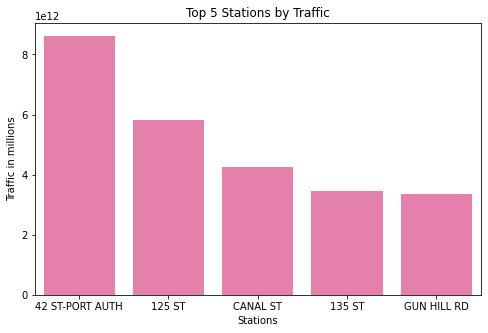

In [209]:
ig = plt.figure(figsize=(8,5))
sns.barplot(data=T5S, x = 'STATION', y = 'TOTAL_TRAFIC', color='#f56fa7').set(title='Top 5 Stations by Traffic', xlabel='Stations', ylabel='Traffic in millions')

In [210]:
T6S=df_station_daily.groupby('STATION')['TOTAL_TRAFIC'].sum().reset_index().sort_values(['TOTAL_TRAFIC'],ascending=True).head()
T6S=T6S.reset_index()

[Text(0.5, 1.0, 'The five stations are the least crowded'),
 Text(0.5, 0, 'Stations'),
 Text(0, 0.5, 'Traffic in millions')]

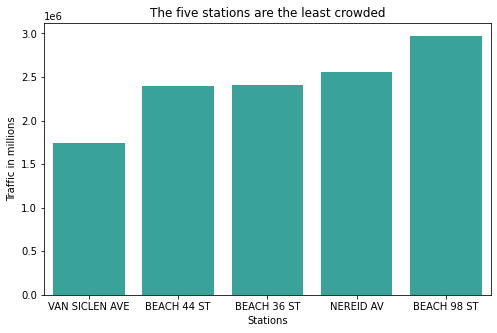

In [211]:
ig = plt.figure(figsize=(8,5))
sns.barplot(data=T6S, x = 'STATION', y = 'TOTAL_TRAFIC', color='#27b4a7').set(title='The five stations are the least crowded', xlabel='Stations', ylabel='Traffic in millions')

<AxesSubplot:xlabel='STATION', ylabel='ENTRIES'>

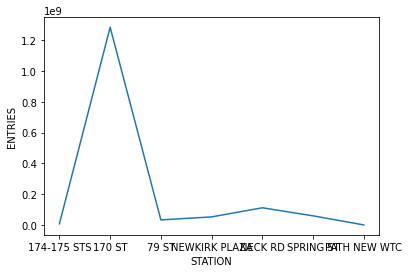

In [212]:
random_df =  df_station_daily.sample(n=7)
sns.lineplot(data = random_df, x="STATION", y="ENTRIES")